In [36]:
import PIL
import PIL.Image as Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
image = Image.open('Sample_Pic_OD/HJ.jpg')

In [18]:
image = image.rotate(270)

In [19]:
type(image)

PIL.Image.Image

In [20]:
pix = np.array(image)

(-0.5, 3263.5, 2447.5, -0.5)

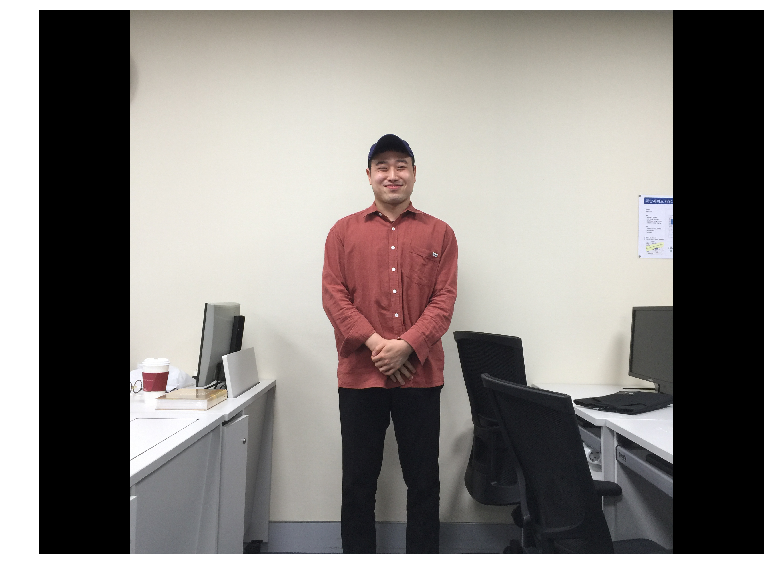

In [22]:
plt.figure(figsize=(16,10))

plt.imshow(pix)
plt.axis('off')

In [47]:
face_cascade = cv2.CascadeClassifier('harrs/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('harrs/haarcascade_eye.xml')
left_eye_cascade = cv2.CascadeClassifier('harrs/haarcascade_lefteye_2splits.xml')
right_eye_cascade = cv2.CascadeClassifier('harrs/haarcascade_righteye_2splits.xml')

In [65]:
def detect(gray, frame):
  """ Input = greyscale image or frame from video stream
      Output = Image with rectangle box in the face
  """
  # Now get the tuples that detect the faces using above cascade
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  # faces are the tuples of 4 numbers
  # x,y => upperleft corner coordinates of face
  # width(w) of rectangle in the face
  # height(h) of rectangle in the face
  # grey means the input image to the detector
  # 1.3 is the kernel size or size of image reduced when applying the detection
  # 5 is the number of neighbors after which we accept that is a face
  
  # Now iterate over the faces and detect eyes
  for (x,y,w,h) in faces:
#     cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    # Arguements => image, top-left coordinates, bottomright coordinates, color, rectangle border thickness
    
    # we now need two region of interests(ROI) grey and color for eyes one to detect and another to draw rectangle
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    # Detect eyes now
#     eyes = eyes_cascade.detectMultiScale(roi_gray, 1.1, 3)
    leyes = left_eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
    reyes = right_eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
    
    eyelist = [leyes, reyes]
    # Now draw rectangle over the eyes
    for eyes in eyelist:
        for (ex, ey, ew, eh) in eyes:
          cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 2)
      
  return frame, [faces, leyes, reyes]

face loc: [[1470  618  237  237]], left loc: [[129  54  59  59]
 [ 52  60  59  59]], right loc: [[ 53  59  59  59]
 [136  52  59  59]
 [133 136  54  54]]


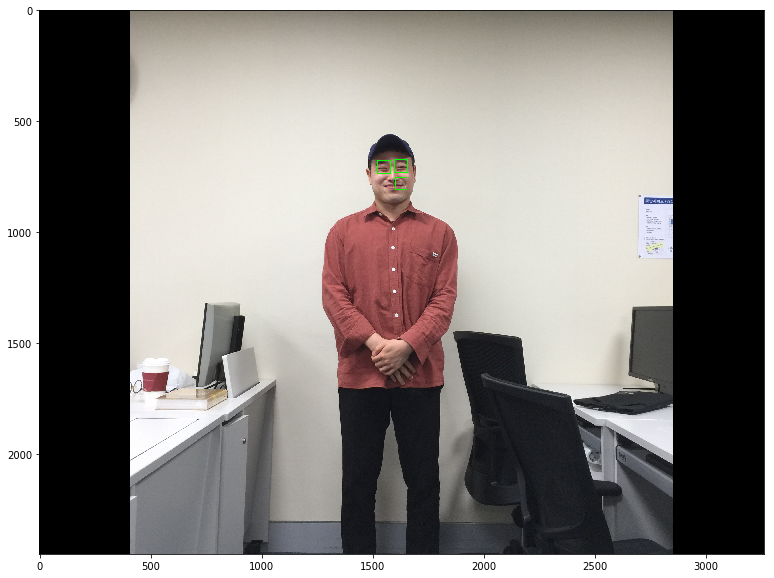

In [67]:
image = Image.open('Sample_Pic_OD/HJ.jpg').rotate(270)
pix = np.array(image)

gray = cv2.cvtColor(pix, cv2.COLOR_RGB2GRAY)
canvas, loc = detect(gray, pix)
plt.figure(figsize=(16,10))
plt.imshow(canvas)

print('face loc: {}, left loc: {}, right loc: {}'.format(loc[0],loc[1],loc[2]))

face loc: [[1513  168  283  283]], left loc: [[157  68  67  67]
 [ 67  76  61  61]
 [141 170  64  64]], right loc: [[ 66  74  65  65]
 [161  70  64  64]]


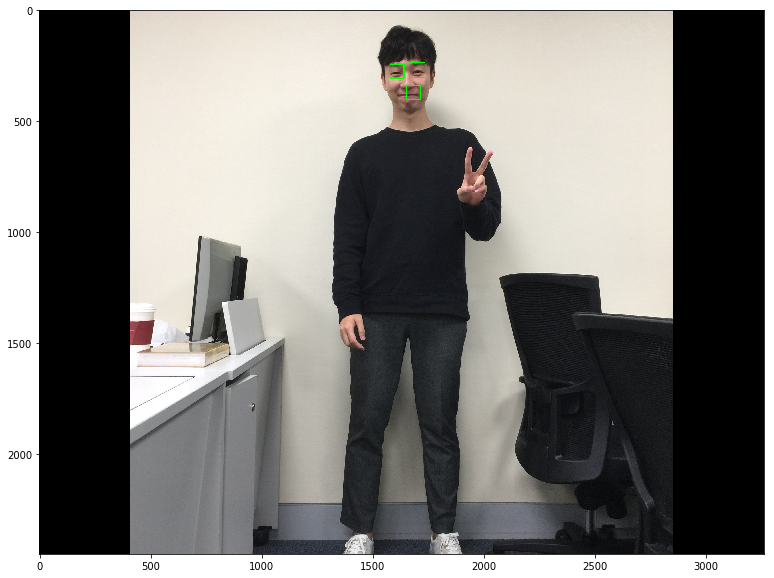

In [68]:
image = Image.open('Sample_Pic_OD/YK.jpg').rotate(270)
pix = np.array(image)

gray = cv2.cvtColor(pix, cv2.COLOR_RGB2GRAY)
canvas, loc = detect(gray, pix)
plt.figure(figsize=(16,10))
plt.imshow(canvas)

print('face loc: {}, left loc: {}, right loc: {}'.format(loc[0],loc[1],loc[2]))

face loc: [[93 12 56 56]], left loc: (), right loc: [[ 8  2 28 28]]


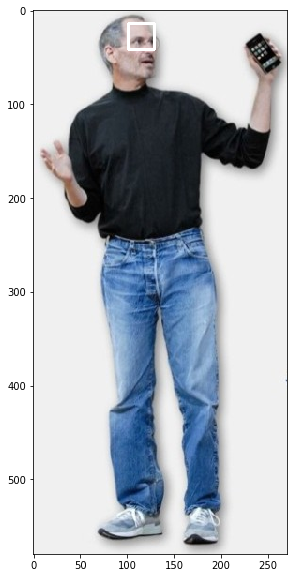

In [70]:
image = Image.open('Sample_Pic_OD/SJ.PNG')
pix = np.array(image)

gray = cv2.cvtColor(pix, cv2.COLOR_RGB2GRAY)
canvas, loc = detect(gray, pix)
plt.figure(figsize=(16,10))
plt.imshow(canvas)

print('face loc: {}, left loc: {}, right loc: {}'.format(loc[0],loc[1],loc[2]))

face loc: [[1561  141  228  228]
 [1548  192  288  288]], left loc: [[68 68 82 82]], right loc: [[67  2 50 50]]


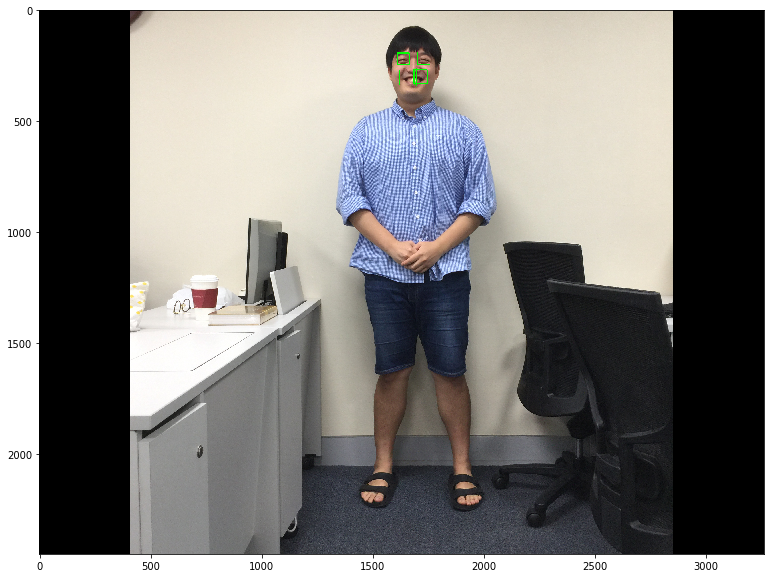

In [71]:
image = Image.open('Sample_Pic_OD/TH.jpg').rotate(270)
pix = np.array(image)

gray = cv2.cvtColor(pix, cv2.COLOR_RGB2GRAY)
canvas, loc = detect(gray, pix)
plt.figure(figsize=(16,10))
plt.imshow(canvas)

print('face loc: {}, left loc: {}, right loc: {}'.format(loc[0],loc[1],loc[2]))

face loc: [[1592  649  218  218]], left loc: [[ 56  46  47  47]
 [136  44  52  52]], right loc: [[53 43 51 51]]


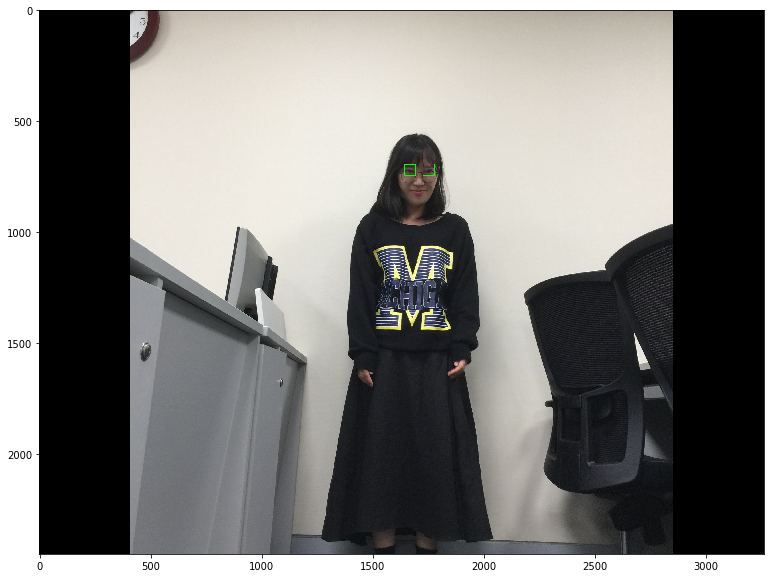

In [72]:
image = Image.open('Sample_Pic_OD/YJ.jpg').rotate(270)
pix = np.array(image)

gray = cv2.cvtColor(pix, cv2.COLOR_RGB2GRAY)
canvas, loc = detect(gray, pix)
plt.figure(figsize=(16,10))
plt.imshow(canvas)

print('face loc: {}, left loc: {}, right loc: {}'.format(loc[0],loc[1],loc[2]))